# IMPORT LIBRARIES

In [39]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from tkinter import Tk, simpledialog
from tkinter import filedialog
from tkinter import messagebox


# EXTRACT DATA AND PERFORM TEST

Columns in Excel sheet:
Index(['X', 'Y', 'Z', 'Alpha', 'Beta'], dtype='object')


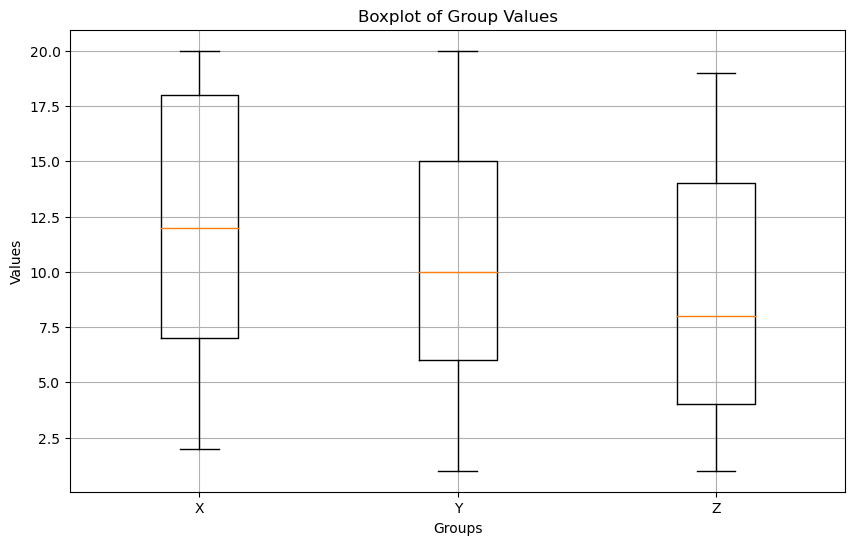

One-way ANOVA results:
F-statistic: 2.657
P-value: 0.074
Degrees of freedom (between): 2
Degrees of freedom (within): 48
Sum of squares (between): 4732.083
Mean squares (between): 2366.042
Standard Error (SE) for X: 0.851
Standard Error (SE) for Y: 0.793
Standard Error (SE) for Z: 0.786

Variance for each group:
X: 35.493
Y: 30.83
Z: 30.25
Fail to reject the null hypothesis: There is no significant difference between groups.


In [40]:
def read_excel_file(file_path):
    """Reads an Excel file and returns a DataFrame."""
    try:
        df = pd.read_excel(file_path)  # Read Excel file into a temporary DataFrame
        df = df.dropna(axis=1, how='all')  # Drop columns that are entirely blank
        return df  # Return the DataFrame
    except Exception as e:
        print(f"Error reading Excel file: {e}")  # Print error message if file reading fails
        return None  # Return None if an error occurs

def perform_one_way_anova(df, group_cols):
    """Performs one-way ANOVA and displays additional statistics."""
    try:
        # Perform one-way ANOVA
        data = [df[col] for col in group_cols]
        f_stat, p_value = stats.f_oneway(*data)

        # Calculate degrees of freedom
        df_between = len(group_cols) - 1
        df_within = len(df) - len(group_cols[0])

        # Calculate sum of squares
        ss_between = sum(df[col].var() * len(df[col]) for col in group_cols)
        ss_within = sum((df[col] - df[col].mean())**2 for col in group_cols)

        # Calculate mean squares
        ms_between = ss_between / df_between
        ms_within = ss_within / df_within

        # Calculate effect size (partial eta-squared)
        eta_squared = ss_between / (ss_between + ss_within)

        # Calculate standard error (SE)
        se_means = [np.std(df[col], ddof=1) / np.sqrt(len(df[col])) for col in group_cols]

        # Plot boxplots
        plt.figure(figsize=(10, 6))
        plt.boxplot(data, labels=group_cols)
        plt.xlabel('Groups')
        plt.ylabel('Values')
        plt.title('Boxplot of Group Values')
        plt.grid(True)
        plt.show()

        # Print ANOVA results
        print("One-way ANOVA results:")
        print(f"F-statistic: {round(f_stat, 3)}")
        print(f"P-value: {round(p_value, 3)}")
        print(f"Degrees of freedom (between): {df_between}")
        print(f"Degrees of freedom (within): {df_within}")
        print(f"Sum of squares (between): {round(ss_between, 3)}")
        # print(f"Sum of squares (within):\n {round(ss_within, 3)}")
        print(f"Mean squares (between): {round(ms_between, 3)}")
        # print(f"Mean squares (within):\n {round(ms_within, 3)}")
        # print(f"Partial eta-squared: {round(eta_squared, 3)}")

         # Print standard error (SE) of means
        for i, col in enumerate(group_cols):
            print(f"Standard Error (SE) for {col}: {round(se_means[i], 3)}")
        
        # Calculate and print variance for each group
        print("\nVariance for each group:")
        for col in group_cols:
            var = df[col].var()
            print(f"{col}: {round(var, 3)}")

        # Interpret the results
        alpha = 0.05  # significance level
        if p_value < alpha:
            print("Reject the null hypothesis: There is a significant difference between at least two groups.")
        else:
            print("Fail to reject the null hypothesis: There is no significant difference between groups.")

    except Exception as e:
        print(f"Error performing one-way ANOVA and plotting boxplots: {e}")

def get_user_column_selection(df):
    """Gets user input for selecting columns using dialog boxes."""
    root = Tk()
    root.withdraw()  # Hide the main window

    # Get column names from the DataFrame
    columns = df.columns.tolist()

    while True:
        num_groups = simpledialog.askinteger("Input", "Enter the number of groups (must be 3 or more):")
        if num_groups is None:
            return None, None  # User canceled the input
        elif num_groups >= 3:
            break
        else:
            messagebox.showerror("Error", "Please enter 3 or more groups.")

    group_cols = []
    for i in range(num_groups):
        group_col = simpledialog.askstring("Input", f"Enter the column name for group {i + 1}:\nAvailable columns: {', '.join(columns)}")
        if group_col is None:
            return None, None  # User canceled the input
        group_cols.append(group_col)

    return group_cols

def main():
    # Open a file dialog to select Excel file
    root = Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx"), ("All files", "*.*")])
    if not file_path:
        print("No file selected.")
        return

    # Read Excel file into DataFrame
    df = read_excel_file(file_path)
    if df is None:
        print("Error reading Excel file.")
        return

    print("Columns in Excel sheet:")
    print(df.columns)  # Display column names

    # Get user input for selecting columns
    group_cols = get_user_column_selection(df)
    if group_cols is None:
        print("Error: User canceled the input or entered invalid data.")
        return

    # Perform one-way ANOVA and plot boxplots
    perform_one_way_anova(df, group_cols)

if __name__ == "__main__":
    main()